In [1]:
#bring the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import Rbf, InterpolatedUnivariateSpline
%matplotlib inline

In [2]:
#import a spreadsheet file containing sieving data of a sand sample at half phi interval
df = pd.read_csv(r'C:\Path\FileName.csv') #Specify the path to a *.csv file

In [3]:
df.head(11)  #Just to look at the file. The file should contain columns for mm, phi, phi_mid, wt_percent, and cumul_wt_percent 

,mm,phi,phi_mid,wt_sieve,wt_sieve_sample,wt_sample,wt_percent,cumul_wt_percent
0,1,0.0,-0.25,400.70,402.60,1.90,0.86,0.86
1,0.71,0.5,0.25,402.12,402.43,0.31,0.14,1.00
2,0.5,1.0,0.75,416.83,417.48,0.65,0.29,1.29
3,0.355,1.5,1.25,397.40,400.44,3.04,1.37,2.67
4,0.25,2.0,1.75,334.70,344.96,10.26,4.64,7.31
5,0.18,2.5,2.25,332.43,375.40,42.97,19.43,26.74
6,0.125,3.0,2.75,331.60,462.82,131.22,59.34,86.08
7,0.09,3.5,3.25,345.74,374.52,28.78,13.02,99.10
8,0.063,4.0,3.75,363.88,365.58,1.70,0.77,99.87
9,pan,4.5,4.25,351.08,351.37,0.29,0.13,100.00


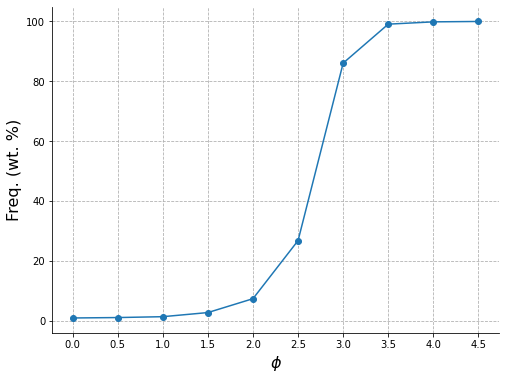

In [4]:
#Make a cumulative freq. graph of grain size using phi values for the x axis

fig,ax = plt.subplots(figsize=(8, 6))

x=df['phi'].values
y=df['cumul_wt_percent'].values

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#PLot the dots and line and assign ticks and labels
ax.plot(x,y, marker='o')

xticks = [ 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5 ]
ax.set_xticks(xticks)

ax.set_xlabel(r'$\phi$', fontsize=16)
ax.set_ylabel('Freq. (wt. %)', fontsize=16) #r'$\alpha > \beta$'

#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()

fig.savefig('cumFq.svg', bbox_inches = 'tight', format='svg')

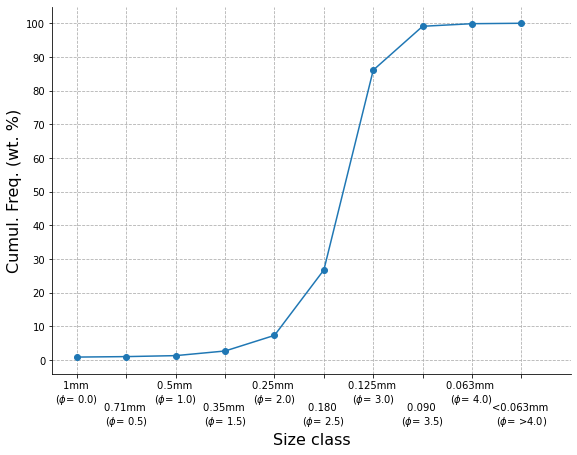

In [5]:
#Make a cumulative freq. graph of grain size using size categories for the x axis

fig = plt.figure( figsize=(8, 6) )
ax = fig.add_axes( [.05, .1, .9, .85 ] )
ax.set_yticks( np.linspace(0, 100, 11 ) )

y=df['cumul_wt_percent'].values

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Plot the dots and line and assign ticks and labels
ax.plot(y, marker='o')

ax.set_xlabel('Size class', fontsize=16)
ax.set_ylabel('Cumul. Freq. (wt. %)', fontsize=16) #r'$\alpha > \beta$'

xticks = [ 0, 1, 2, 3, 4, 5, 6, 7, 8, 9 ]
xlbls = ['1mm \n($\phi$= 0.0)', '0.71mm \n($\phi$= 0.5)', '0.5mm \n($\phi$= 1.0)', '0.35mm \n($\phi$= 1.5)', 
'0.25mm \n($\phi$= 2.0)', '0.180 \n($\phi$= 2.5)', '0.125mm \n($\phi$= 3.0)', '0.090 \n($\phi$= 3.5)', '0.063mm \n($\phi$= 4.0)', '<0.063mm \n($\phi$= >4.0)' ]

ax.set_xticks( xticks )
ax.set_xticklabels( xlbls )
ax.set_xlim(-0.5, 10)

# vertical alignment of xtick labels
va = [ 0, -.06, 0, -.06, 0, -.06, 0, -.06, 0, -0.06 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )


#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()

fig.savefig('cumFq2.svg', bbox_inches = 'tight', format='svg')


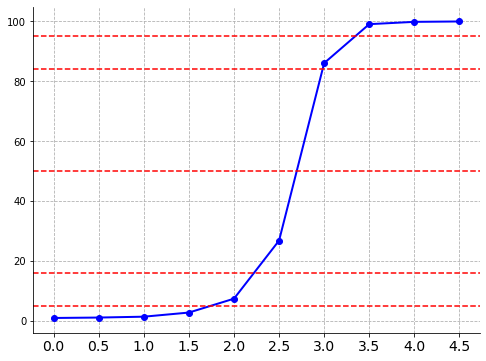

[[  0.     0.86]
 [  0.5    1.  ]
 [  1.     1.29]
 [  1.5    2.67]
 [  2.     7.31]
 [  2.5   26.74]
 [  3.    86.08]
 [  3.5   99.1 ]
 [  4.    99.87]
 [  4.5  100.  ]]


In [6]:
#Now, let's make the plot again and add horizontal lines at specific cumul. freq. 

x=df['phi']
y=df['cumul_wt_percent']

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1) # row-col-num

# --- line plot data on the Axes
ax.plot(x, y, 'b-', linewidth=2, marker='o')
line = plt.gca().lines[0].get_xydata()  #Create an array of the points along the line for skewness calcul. below

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.set_xticks(x)
ax.set_xticklabels(x, fontsize=14)

#horizontal lines to visualize y values for skewness calc.
plt.axhline(y = 5, color = 'r', linestyle = 'dashed')
plt.axhline(y = 16, color = 'r', linestyle = 'dashed')
plt.axhline(y = 50, color = 'r', linestyle = 'dashed')
plt.axhline(y = 84, color = 'r', linestyle = 'dashed')
plt.axhline(y = 95, color = 'r', linestyle = 'dashed')

#Add the grid lines and show the plot
ax.grid(True, linestyle='--')
plt.show()
print(line)

In [7]:
#Lets calculate skewness
#First, we need to extract the phi values at given cumul. percent
x=line[0:,0]
y=line[0:,1]
Phi_5p = np.interp(5, y, x).round(2)
Phi_16p = np.interp(16, y, x).round(2)
Phi_50p = np.interp(50, y, x).round(2)
Phi_84p = np.interp(84, y, x).round(2)
Phi_95p = np.interp(95, y, x).round(2)
print(Phi_5p)
print(Phi_16p)
print(Phi_50p)
print(Phi_84p)
print(Phi_95p)

1.75
2.22
2.7
2.98
3.34


In [8]:
#Skewness based on the linear interpolation above

Skn=((Phi_84p+Phi_16p-(2*Phi_50p))/(2*(Phi_84p-Phi_16p)))+((Phi_95p+Phi_5p-(2*Phi_50p))/(2*(Phi_95p-Phi_5p)))

print(Skn)

-0.22906322409798113


In [9]:
if Skn >0.3:
    print("Strongly fine-skewed")
elif Skn >=0.1:
    print("Fine skewed")
elif Skn >=-0.1:
    print("Near symmetrical")
elif Skn >=-0.3:
    print("Coarse skewed")
else:
    print("Strongly coarse skewed")
        

Coarse skewed


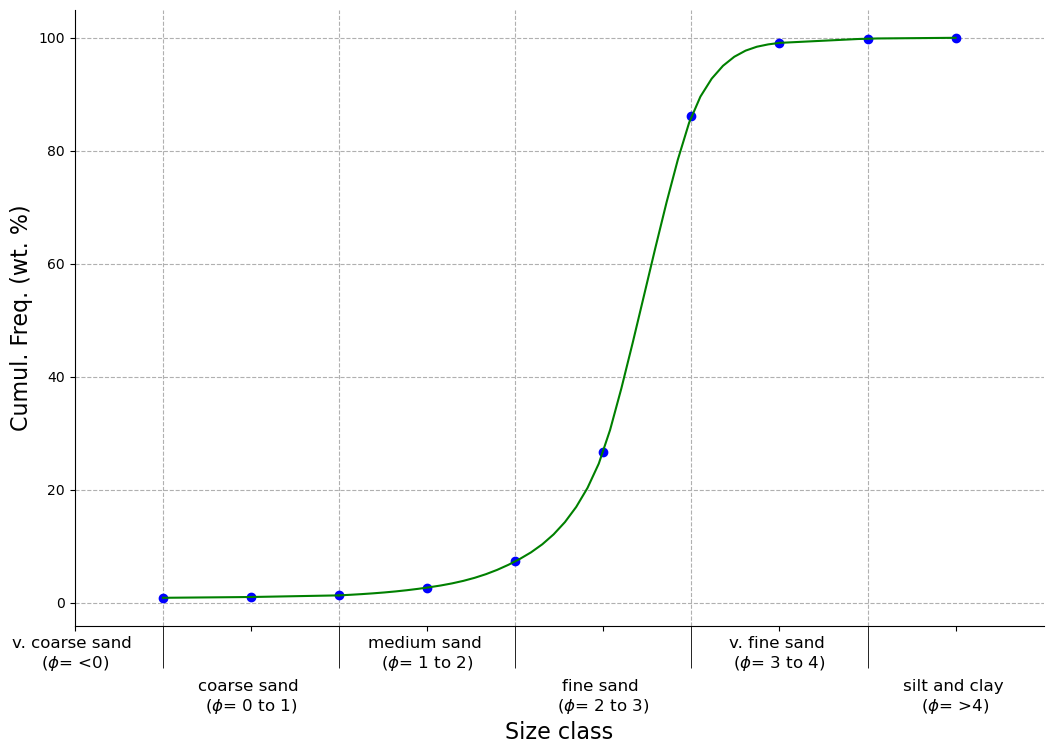

In [17]:
#Same graph but this time with a RBF-linear combo interpolation

x=df['phi'].values
y=df['cumul_wt_percent'].values
xi = np.linspace(1.0, 3.5, 40) 
xj=np.linspace(3.5, 4.5, 10) #That one is for the short linear line at the right extremity
xk=np.linspace(0, 1.0, 10) #That one is for the short linear line at the left extremity


fig = plt.figure(figsize=(12.5,8))
ax = fig.add_subplot(1,1,1) # row-col-num
ax.set_xlim((-0.5, 5.0,))

# Hide the right and top lines of the default box
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#Plot the dots and line and assign ticks and labels
ax.plot(x, y, 'bo')
ax.set_xlabel('Size class', fontsize=16)
ax.set_ylabel('Cumul. Freq. (wt. %)', fontsize=16) #r'$\alpha > \beta$'


# use RBF method
rbf = Rbf(x, y, function='thin_plate')
fi = rbf(xi)

rbf=Rbf(x, y, function='linear')
fj=rbf(xj)

rbf=Rbf(x, y, function='linear')
fk=rbf(xk)

ax.plot(xi, fi, 'g')
ax.plot(xj, fj, 'g')
ax.plot(xk, fk, 'g')

#location of the ticks and their labels
xticks = [ -0.5, 0.5, 1.5, 2.5, 3.5, 4.5]
xticks_minor = [ 0, 1, 2, 3, 4]
xlbls = ['v. coarse sand \n($\phi$= <0)', 'coarse sand \n($\phi$= 0 to 1)', 'medium sand \n($\phi$= 1 to 2)', 
'fine sand \n($\phi$= 2 to 3)', 'v. fine sand \n($\phi$= 3 to 4)', 'silt and clay \n($\phi$= >4)']

ax.set_xticks( xticks )
ax.set_xticks( xticks_minor, minor=True )
ax.set_xticklabels( xlbls, fontsize=12 )

ax.tick_params( axis='x', which='minor', direction='out', length=30 )
#ax.tick_params( axis='x', which='major', bottom='off', top='off' ) optional to show ticks at the top

# vertical alignment of xtick labels
va = [ 0, -.07, 0, -.07, 0, -.07, 0, -.07 ]
for t, y in zip( ax.get_xticklabels( ), va ):
    t.set_y( y )

#Add the grid lines
ax.grid(True, which='minor', axis='x', linestyle='--')
ax.grid(True, which='major', axis='y', linestyle='--')

#For some reason, the image is cropped without the bbox info
#fig.savefig('B_5_cumFq2.svg', bbox_inches = 'tight', format='svg')

In [11]:
#Lets recalculate skewness, this time using the RBF curve

rbf_curve=np.array([xi, fi]) #Create an array of the rbf curve values excluding the linear parts at both ends
print(rbf_curve)

[[ 1.          1.06410256  1.12820513  1.19230769  1.25641026  1.32051282
   1.38461538  1.44871795  1.51282051  1.57692308  1.64102564  1.70512821
   1.76923077  1.83333333  1.8974359   1.96153846  2.02564103  2.08974359
   2.15384615  2.21794872  2.28205128  2.34615385  2.41025641  2.47435897
   2.53846154  2.6025641   2.66666667  2.73076923  2.79487179  2.85897436
   2.92307692  2.98717949  3.05128205  3.11538462  3.17948718  3.24358974
   3.30769231  3.37179487  3.43589744  3.5       ]
 [ 1.29        1.39369172  1.51215374  1.64832434  1.8059262   1.98910971
   2.20211418  2.4485545   2.72770215  3.04021751  3.41078651  3.85703122
   4.39480735  5.03956797  5.80614466  6.70641913  7.731748    8.91016081
  10.33745186 12.09141326 14.25848737 16.94772709 20.31351111 24.62071326
  30.57769222 37.94570588 45.99016921 54.34808449 62.73046924 70.85976022
  78.42350011 84.97153503 89.59044783 92.77020124 95.04393617 96.64437032
  97.72822775 98.41986226 98.8328573  99.1       ]]


In [12]:
rbf_curveT=rbf_curve.T               #Transpose array
print(rbf_curveT)

[[ 1.          1.29      ]
 [ 1.06410256  1.39369172]
 [ 1.12820513  1.51215374]
 [ 1.19230769  1.64832434]
 [ 1.25641026  1.8059262 ]
 [ 1.32051282  1.98910971]
 [ 1.38461538  2.20211418]
 [ 1.44871795  2.4485545 ]
 [ 1.51282051  2.72770215]
 [ 1.57692308  3.04021751]
 [ 1.64102564  3.41078651]
 [ 1.70512821  3.85703122]
 [ 1.76923077  4.39480735]
 [ 1.83333333  5.03956797]
 [ 1.8974359   5.80614466]
 [ 1.96153846  6.70641913]
 [ 2.02564103  7.731748  ]
 [ 2.08974359  8.91016081]
 [ 2.15384615 10.33745186]
 [ 2.21794872 12.09141326]
 [ 2.28205128 14.25848737]
 [ 2.34615385 16.94772709]
 [ 2.41025641 20.31351111]
 [ 2.47435897 24.62071326]
 [ 2.53846154 30.57769222]
 [ 2.6025641  37.94570588]
 [ 2.66666667 45.99016921]
 [ 2.73076923 54.34808449]
 [ 2.79487179 62.73046924]
 [ 2.85897436 70.85976022]
 [ 2.92307692 78.42350011]
 [ 2.98717949 84.97153503]
 [ 3.05128205 89.59044783]
 [ 3.11538462 92.77020124]
 [ 3.17948718 95.04393617]
 [ 3.24358974 96.64437032]
 [ 3.30769231 97.72822775]
 

In [13]:
#Extract the phi values at given cumul. percent to calculate Skewness
x=rbf_curveT[0:,0]
y=rbf_curveT[0:,1]
Phi_5p = np.interp(5, y, x).round(2)
Phi_16p = np.interp(16, y, x).round(2)
Phi_50p = np.interp(50, y, x).round(2)
Phi_84p = np.interp(84, y, x).round(2)
Phi_95p = np.interp(95, y, x).round(2)
print(Phi_5p)
print(Phi_16p)
print(Phi_50p)
print(Phi_84p)
print(Phi_95p)

1.83
2.32
2.7
2.98
3.18


In [14]:
#Skewness based on the rbf interpolation above

Skn_rbf=((Phi_84p+Phi_16p-(2*Phi_50p))/(2*(Phi_84p-Phi_16p)))+((Phi_95p+Phi_5p-(2*Phi_50p))/(2*(Phi_95p-Phi_5p)))

print(Skn_rbf.round(2))

-0.22


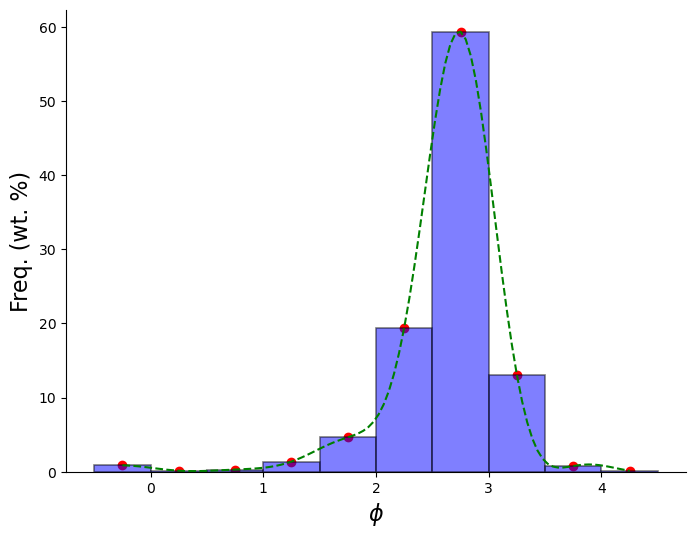

In [15]:
#to get the default black frame
plt.style.use('default') 
fig,ax = plt.subplots(figsize=(8,6))
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
x_mid=df['phi_mid'].values


#Make the bar plot
ax.bar(x_mid, df['wt_percent'], color=('b'),  alpha=0.5, edgecolor='black', linewidth=1.2, width=0.5)   #alpha is for transparency
ax.set_xlabel(r'$\phi$', fontsize=16)
ax.set_ylabel('Freq. (wt. %)', fontsize=16)

#Add the points
ax.scatter(x_mid, df['wt_percent'], c='red', marker='o')

x=df['phi_mid']
y=df['wt_percent']
xi = np.linspace(-0.25, 4.25, 100) #start, stop, number of nodes on the curve
#xj=np.linspace(3.5, 4.5, 10)

# use RBF interpolation method to generate a smooth curve
rbf = Rbf(x, y, function='gaussian')      #'multiquadric', 'inverse', 'gaussian', 'linear', 'quintic', 'thin_plate'
fi = rbf(xi)

plt.plot(xi, fi, 'g', linestyle = '--')


